# _`expression`_.`star_normal_form()`

Compute the _star normal form_ of a (Boolean) expression: an equivalent expression where the star operator is applied only on proper expressions (i.e., expressions whose constant term is null).

Preconditions:
- The expression is Boolean

Postconditions:
- The Result is equivalent to the input expression
- The standard automata of the Result and of the input are isomorphic.

See also:
- [_expression_.standard](expression.standard.ipynb)

Caveat:
- Although the notion of "star normal form" is perfectly valid for weighted expressions, this implementation is unable to compute the star normal form in this case.  One could work-around this limitation by running _`exp`_`.standard().expression()`.

## Examples

The following function allows to display nicely expressions and their star-normal form.

In [1]:
import vcsn
from IPython.display import Latex

def snf(*es):
    eqs = []
    for e in es:
        e = vcsn.B.expression(e)
        eqs.append(r'{e:x} &\Rightarrow {snf:x}'
                   .format(e=e, snf=e.star_normal_form()))
    return Latex(r'''\begin{{aligned}}
        {eqs}
    \end{{aligned}}'''.format(eqs = r'\\'.join(eqs)))

In [2]:
snf('a**', 'a?{+}', '(a+b*)*', '(a*+b*)*', '(ab)*', '(ab?)*', '(a?b?)*', '(a*b*c*)**')

<IPython.core.display.Latex object>

Of course, expressions already in star-normal form are returned unmodified.

In [3]:
snf('a*', '(a+b+c)*')

<IPython.core.display.Latex object>

An expression and its star-normal form have the same standard automaton.

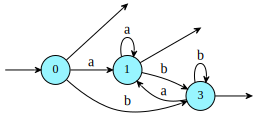

In [4]:
r = vcsn.B.expression('(a*b*)*')
r.standard()

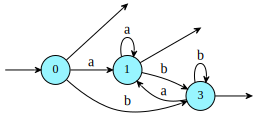

In [5]:
r.star_normal_form().standard()